# Data Assimilation - Midterm Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Lorenz System

\begin{equation}
\frac{dx_1}{dt} = -Ax_1 + Ax_2, \frac{dx_2}{dt} = Bx_1 - x_1x_3 - x_2, \frac{dx_3}{dt} = x_1x_2 - Cx_3
\end{equation}

In [7]:
def dfdt(r, coeffs):
    '''
    Returns dx1/dt, dx2/dt, dx3/dt
    '''
    # Current position
    x1 = r[0]
    x2 = r[1]
    x3 = r[2]
    
    # Extract coefficients
    A = coeffs[0]
    B = coeffs[1]
    C = coeffs[2]
    
    # Calculate the derivative
    dx1 = -A*x1 + A*x2
    dx2 = B*x1 - x1*x3 - x2
    dx3 = x1*x2 - C*x3
    
    return np.array([dx1, dx2, dx3], float)

In [19]:
## Physical Parameters
A = 10
B = 28
C = 8/3
coeffs = np.array([A, B, C])

# Numerical parameters
t0 = 0          # sec, initial time
tf = 10          # sec, final time
N = 1000        # number of steps
h = (tf-t0)/N   # s, step size
t_hist = np.arange(t0,tf,h)   # time history

## Initial conditions
x1_hist = np.zeros([N])  # x1 history
x2_hist = np.zeros([N])
x3_hist = np.zeros([N])
x1_0 = 1
x2_0 = 1
x3_0 = 1

## Iterate through time and simulate dynamics
r = np.array([x1_0, x2_0, x3_0], float)   # "Current" position
for i in range(N):
    # Current time step (i)
    x1_hist[i] = r[0]
    x2_hist[i] = r[1]
    x3_hist[i] = r[2]
    
    # Calculate Runge-Kutta4 coefficients
    k1 = h*dfdt(r, coeffs)
    k2 = h*dfdt(r+0.5*k1, coeffs)
    k3 = h*dfdt(r+0.5*k2, coeffs)
    k4 = h*dfdt(r+k3, coeffs)
    
    # Update current position
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    

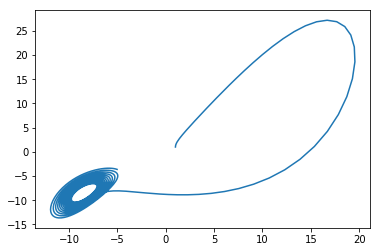

In [20]:
plt.plot(x1_hist,x2_hist)
plt.show()

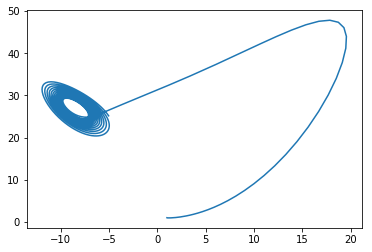

In [21]:
plt.plot(x1_hist,x3_hist)
plt.show()

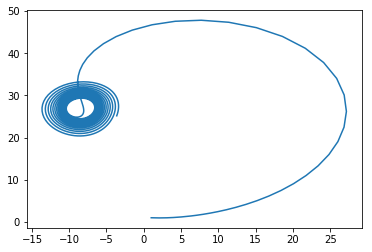

In [22]:
plt.plot(x2_hist,x3_hist)
plt.show()